In [1]:
import numpy as np
import pandas as pd
# pd.options.plotting.backend = "plotly"
df = pd.read_excel("./SafeStub_Financial_Model_Template.xlsx")
dates = df.columns[2:]
totalBuyers = np.array(df.iloc[3, 2:])
totalOrders = np.array(df.iloc[4, 2:])
shape = totalOrders.shape


def full(n: float):
    return np.full(totalOrders.shape, n)


In [2]:
salaries = {
    "Sales / Marketing": 90000,
    "Creative": 60000,
    "Technology": 40000,
    "Product Management": 80000,
    "Exec / Admin": 0,
}

df = pd.DataFrame()
df["Total Orders"] = totalOrders
df["Total Buyers"] = totalBuyers

df["Revenue: Commission: Buyer"] = 0.05
df["Revenue: Average Price per Ticket"] = 150
df["Revenue: Average Ticket Quantity by Order"] = 2.3

df["Payment Processing Fixed Fee per Order"] = 0.79
df["Payment Processing %"] = 0.0349
df["COGS: Commission: Seller"] = 0.05
df["COGS: Seller Order Revenue"] = 1 - df["COGS: Commission: Seller"]

# Total Net Revenue

df["Revenue: AOV (average order value)"] = (
    df["Revenue: Average Ticket Quantity by Order"]
    * df["Revenue: Average Price per Ticket"]
)
df["Order Revenue"] = df["Total Orders"] * df["Revenue: AOV (average order value)"]
df["Buyer Commission Revenue"] = df["Order Revenue"] * df["Revenue: Commission: Buyer"]

df["Total Net Revenue"] = df["Order Revenue"] + df["Buyer Commission Revenue"]

df["Seller Order Revenue"] = df["Order Revenue"] * df["COGS: Seller Order Revenue"]
df["Credit Card Fees"] = (df["Total Net Revenue"] * df["Payment Processing %"]) + (
    df["Total Orders"] * df["Payment Processing Fixed Fee per Order"]
)
df["Total COGS"] = df["Seller Order Revenue"] + df["Credit Card Fees"]

df["Gross Margin"] = df["Total Net Revenue"] - df["Total COGS"]
df["GM%"] = df["Gross Margin"] / df["Total Net Revenue"]

df["Headcount: Sales / Marketing"] = 0
df["Headcount: Creative"] = 0
df["Headcount: Technology"] = 1
df["Headcount: Product Management"] = 0
df["Headcount: Exec/Admin"] = 1
df["Headcount: Benefits, Taxes, Etc."] = 0.25

# Operating expenses
df["Personnel Expense: Sales/Marketing"] = (
    salaries["Sales / Marketing"] / 12 * df["Headcount: Sales / Marketing"]
)
df["Personnel Expense: Creative"] = (
    salaries["Creative"] / 12 * df["Headcount: Creative"]
)
df["Personnel Expense: Technology"] = (
    salaries["Technology"] / 12 * df["Headcount: Technology"]
)
df["Personnel Expense: Product Management"] = (
    salaries["Product Management"] / 12 * df["Headcount: Product Management"]
)
df["Personnel Expense: Exec/Admin"] = (
    salaries["Exec / Admin"] / 12 * df["Headcount: Exec/Admin"]
)
df["Personnel Expense: Benefits, Taxes, Etc"] = (
    df["Personnel Expense: Sales/Marketing"]
    + df["Personnel Expense: Creative"]
    + df["Personnel Expense: Technology"]
    + df["Personnel Expense: Product Management"]
    + df["Personnel Expense: Exec/Admin"]
) * df["Headcount: Benefits, Taxes, Etc."]

df["Total Personnel Exp"] = (
    df["Personnel Expense: Sales/Marketing"]
    + df["Personnel Expense: Creative"]
    + df["Personnel Expense: Technology"]
    + df["Personnel Expense: Product Management"]
    + df["Personnel Expense: Exec/Admin"]
    + df["Personnel Expense: Benefits, Taxes, Etc"]
)


# Other OPEX
df["Other OPEX: Other Marketing"] = 250
df["Other OPEX: Technology"] = 150
df["Other OPEX: Misc Fixed Exp"] = 0
df["Other OPEX: Variable Exp % of Rev"] = 0.025


# Total Other OPEX
# df["Total Other Opex: Avdertising Spend"] =
df["Total Other Opex: Other Marketing"] = df["Other OPEX: Other Marketing"]
df["Total Other Opex: Technology"] = df["Other OPEX: Technology"]
df["Total Other Opex: Misc Fixed Exp"] = df["Other OPEX: Misc Fixed Exp"]
df["Total Other Opex: Variable Exp % of Rev"] = (
    df["Total Net Revenue"] * df["Other OPEX: Variable Exp % of Rev"]
)
df["Other OPEX"] = (
    df["Total Other Opex: Other Marketing"]
    + df["Total Other Opex: Technology"]
    + df["Total Other Opex: Misc Fixed Exp"]
    + df["Total Other Opex: Variable Exp % of Rev"]
    # + df["Total Other Opex: Avdertising Spend"]
)

df["Total OPEX"] = df["Total Personnel Exp"] + df["Other OPEX"]

df["Operating Profit / Burn Rate"] = df["Gross Margin"] - df["Total OPEX"]

df["New Capital"] = 0

df.at[0, "New Capital"] = 25000

cbSeries = pd.Series(df["New Capital"] + df["Operating Profit / Burn Rate"])
df["Cash Balance / Runway"] = cbSeries.cumsum()

In [3]:
df.head()

,Total Orders,Total Buyers,Revenue: Commission: Buyer,Revenue: Average Price per Ticket,Revenue: Average Ticket Quantity by Order,Payment Processing Fixed Fee per Order,Payment Processing %,COGS: Commission: Seller,COGS: Seller Order Revenue,Revenue: AOV (average order value),...,Other OPEX: Variable Exp % of Rev,Total Other Opex: Other Marketing,Total Other Opex: Technology,Total Other Opex: Misc Fixed Exp,Total Other Opex: Variable Exp % of Rev,Other OPEX,Total OPEX,Operating Profit / Burn Rate,New Capital,Cash Balance / Runway
0,97.644444,75.111111,0.05,150,2.3,0.79,0.0349,0.05,0.95,345.0,...,0.025,250,150,0,884.2925,1284.2925,5450.959167,-3393.837274,25000,21606.162726
1,189.944444,146.111111,0.05,150,2.3,0.79,0.0349,0.05,0.95,345.0,...,0.025,250,150,0,1720.184375,2120.184375,6286.851042,-2285.201207,0,19320.961519
2,283.544444,218.111111,0.05,150,2.3,0.79,0.0349,0.05,0.95,345.0,...,0.025,250,150,0,2567.849375,2967.849375,7134.516042,-1160.950547,0,18160.010972
3,382.344444,294.111111,0.05,150,2.3,0.79,0.0349,0.05,0.95,345.0,...,0.025,250,150,0,3462.606875,3862.606875,8029.273542,25.758483,0,18185.769455
4,479.266667,368.666667,0.05,150,2.3,0.79,0.0349,0.05,0.95,345.0,...,0.025,250,150,0,4340.35875,4740.35875,8907.025417,1189.913102,0,19375.682556


In [4]:
df.tail()

,Total Orders,Total Buyers,Revenue: Commission: Buyer,Revenue: Average Price per Ticket,Revenue: Average Ticket Quantity by Order,Payment Processing Fixed Fee per Order,Payment Processing %,COGS: Commission: Seller,COGS: Seller Order Revenue,Revenue: AOV (average order value),...,Other OPEX: Variable Exp % of Rev,Total Other Opex: Other Marketing,Total Other Opex: Technology,Total Other Opex: Misc Fixed Exp,Total Other Opex: Variable Exp % of Rev,Other OPEX,Total OPEX,Operating Profit / Burn Rate,New Capital,Cash Balance / Runway
43,18926.555556,14558.888889,0.05,150,2.3,0.79,0.0349,0.05,0.95,345.0,...,0.025,250,150,0,171403.61875,171803.61875,175970.285417,222764.450586,0,2562824.552253
44,19770.255556,15207.888889,0.05,150,2.3,0.79,0.0349,0.05,0.95,345.0,...,0.025,250,150,0,179044.376875,179444.376875,183611.043542,232898.321119,0,2795722.873372
45,20610.055556,15853.888889,0.05,150,2.3,0.79,0.0349,0.05,0.95,345.0,...,0.025,250,150,0,186649.815625,187049.815625,191216.482292,242985.347874,0,3038708.221246
46,21442.055556,16493.888889,0.05,150,2.3,0.79,0.0349,0.05,0.95,345.0,...,0.025,250,150,0,194184.615625,194584.615625,198751.282292,252978.687074,0,3291686.908319
47,22271.455556,17131.888889,0.05,150,2.3,0.79,0.0349,0.05,0.95,345.0,...,0.025,250,150,0,201695.869375,202095.869375,206262.536042,262940.797089,0,3554627.705408


In [5]:
df.describe()

,Revenue: Commission: Buyer,Revenue: Average Price per Ticket,Revenue: Average Ticket Quantity by Order,Payment Processing Fixed Fee per Order,Payment Processing %,COGS: Commission: Seller,COGS: Seller Order Revenue,Revenue: AOV (average order value),Headcount: Sales / Marketing,Headcount: Creative,...,"Personnel Expense: Benefits, Taxes, Etc",Total Personnel Exp,Other OPEX: Other Marketing,Other OPEX: Technology,Other OPEX: Misc Fixed Exp,Other OPEX: Variable Exp % of Rev,Total Other Opex: Other Marketing,Total Other Opex: Technology,Total Other Opex: Misc Fixed Exp,New Capital
count,4.800000e+01,48.0,4.800000e+01,48.00,4.800000e+01,4.800000e+01,4.800000e+01,48.0,48.0,48.0,...,48.000000,48.000000,48.0,48.0,48.0,4.800000e+01,48.0,48.0,48.0,48.000000
mean,5.000000e-02,150.0,2.300000e+00,0.79,3.490000e-02,5.000000e-02,9.500000e-01,345.0,0.0,0.0,...,833.333333,4166.666667,250.0,150.0,0.0,2.500000e-02,250.0,150.0,0.0,520.833333
std,7.012323e-18,0.0,4.487887e-16,0.00,7.012323e-18,7.012323e-18,1.121972e-16,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.0,0.0,3.506162e-18,0.0,0.0,0.0,3608.439182
min,5.000000e-02,150.0,2.300000e+00,0.79,3.490000e-02,5.000000e-02,9.500000e-01,345.0,0.0,0.0,...,833.333333,4166.666667,250.0,150.0,0.0,2.500000e-02,250.0,150.0,0.0,0.000000
25%,5.000000e-02,150.0,2.300000e+00,0.79,3.490000e-02,5.000000e-02,9.500000e-01,345.0,0.0,0.0,...,833.333333,4166.666667,250.0,150.0,0.0,2.500000e-02,250.0,150.0,0.0,0.000000
50%,5.000000e-02,150.0,2.300000e+00,0.79,3.490000e-02,5.000000e-02,9.500000e-01,345.0,0.0,0.0,...,833.333333,4166.666667,250.0,150.0,0.0,2.500000e-02,250.0,150.0,0.0,0.000000
75%,5.000000e-02,150.0,2.300000e+00,0.79,3.490000e-02,5.000000e-02,9.500000e-01,345.0,0.0,0.0,...,833.333333,4166.666667,250.0,150.0,0.0,2.500000e-02,250.0,150.0,0.0,0.000000
max,5.000000e-02,150.0,2.300000e+00,0.79,3.490000e-02,5.000000e-02,9.500000e-01,345.0,0.0,0.0,...,833.333333,4166.666667,250.0,150.0,0.0,2.500000e-02,250.0,150.0,0.0,25000.000000


<Axes: >

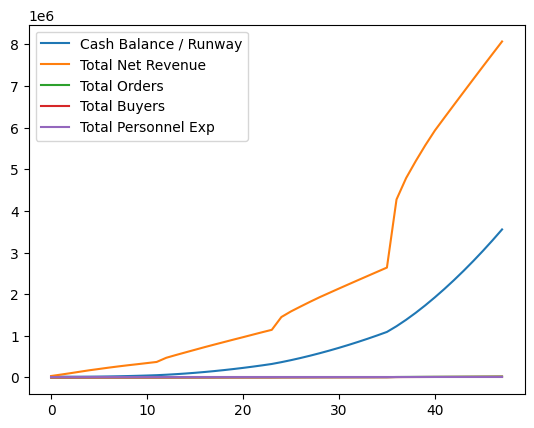

In [9]:
df[["Cash Balance / Runway", "Total Net Revenue", "Total Orders", "Total Buyers", "Total Personnel Exp"]].plot()